In [40]:
#Stock prediction program

import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
# Get the stock data
quandl.ApiConfig.api_key ="2Qqy_hGN9hLtiYi_Z_ua" # API code obtained from personal Quandl registration
df = quandl.get("WIKI/FB", )

# Take a look at the data

print(df.head())

             Open   High    Low    Close       Volume  Ex-Dividend  \
Date                                                                 
2012-05-18  42.05  45.00  38.00  38.2318  573576400.0          0.0   
2012-05-21  36.53  36.66  33.00  34.0300  168192700.0          0.0   
2012-05-22  32.61  33.59  30.94  31.0000  101786600.0          0.0   
2012-05-23  31.37  32.50  31.36  32.0000   73600000.0          0.0   
2012-05-24  32.95  33.21  31.77  33.0300   50237200.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2012-05-18          1.0      42.05      45.00     38.00     38.2318   
2012-05-21          1.0      36.53      36.66     33.00     34.0300   
2012-05-22          1.0      32.61      33.59     30.94     31.0000   
2012-05-23          1.0      31.37      32.50     31.36     32.0000   
2012-05-24          1.0      32.95      33.21     31.77     33.0300   

           

In [23]:
# Get the Adjusted Close price
df = df[['Adj. Close']]
# Take a look at the new data
print(df.head())

            Adj. Close
Date                  
2012-05-18     38.2318
2012-05-21     34.0300
2012-05-22     31.0000
2012-05-23     32.0000
2012-05-24     33.0300


In [24]:
# A variable for predicting  'n' days out into the future
forecast_out = 30

# Create another column for the target value (dependent variable) shifted 'n' units up

df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

# print the new dataset

print(df.head())

            Adj. Close  Prediction
Date                              
2012-05-18     38.2318      30.771
2012-05-21     34.0300      31.200
2012-05-22     31.0000      31.470
2012-05-23     32.0000      31.730
2012-05-24     33.0300      32.170


In [25]:
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-03-21      169.39         NaN
2018-03-22      164.89         NaN
2018-03-23      159.39         NaN
2018-03-26      160.06         NaN
2018-03-27      152.19         NaN


In [26]:
### Create the independent data set (X) ###
# Convert the dataframe to a numpy array

X = np.array(df.drop(['Prediction'],1))

#remove the last 'n' rows 
X = X[:-forecast_out]
print(X)

[[ 38.2318]
 [ 34.03  ]
 [ 31.    ]
 ...
 [171.5499]
 [175.98  ]
 [176.41  ]]


In [27]:
### Create the depndent dataset (y) ###
# Convert the data frame to a numpy array (All of the Values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[ 30.771  31.2    31.47  ... 159.39  160.06  152.19 ]


In [28]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
# Create and train the model usinf Support Vector Algorithm (Regressor)
# this is a supervised learning problem
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
# Testing the model: Score returns the coefficient of determination R^2 of the prediction
# The best possible score is 1
svm_confidence = svr_rbf.score(x_test, y_test)
print('svm confidence: ', svm_confidence)

svm confidence:  0.9843198350736426


In [34]:
# Create and train tghe linear regression Model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Test the Linear Regression Model
# The best possible score is 1
lr_confidence = lr.score(x_test, y_test)
print('lr confidence: ', lr_confidence)

lr confidence:  0.981937215098973


In [37]:
# Set x_forecast equial to the last 30 rows of the original dataset from the Adj.Close Clumn
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[173.15]
 [179.52]
 [179.96]
 [177.36]
 [176.01]
 [177.91]
 [178.99]
 [183.29]
 [184.93]
 [181.46]
 [178.32]
 [175.94]
 [176.62]
 [180.4 ]
 [179.78]
 [183.71]
 [182.34]
 [185.23]
 [184.76]
 [181.88]
 [184.19]
 [183.86]
 [185.09]
 [172.56]
 [168.15]
 [169.39]
 [164.89]
 [159.39]
 [160.06]
 [152.19]]


In [39]:
# Print the prediction for Linear Regression for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# Print the predictionfor the SVM prediction for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[177.16297639 183.61432085 184.05993962 181.4267378  180.05949839
 181.98376126 183.07755278 187.43246349 189.09340617 185.57909451
 182.39899693 179.9886045  180.67728805 184.50555839 183.87764103
 187.85782686 186.47033205 189.39723715 188.92123529 186.00445788
 188.34395642 188.00974235 189.25544936 176.56544213 172.09912673
 173.35496145 168.79749676 163.22726214 163.90581799 155.93531864]
[174.88066367 178.89903967 178.5069483  178.77219271 175.98454656
 179.48566359 179.54548808 186.90711163 179.29551793 183.04004398
 179.77407343 175.78479416 177.46887085 178.74307576 178.61734646
 184.78422684 187.44906148 179.23879439 179.61117898 185.44856742
 181.98040396 183.9012489  179.1868254  176.75390728 172.34873999
 172.84863257 172.21936233 167.38170753 166.07903946 161.75345029]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


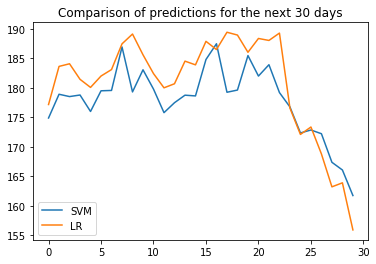

In [54]:
days_out = np.array(range(0,forecast_out))
print(days_out)
plt.figure()
plt.plot(days_out, svm_prediction, label = 'SVM')
plt.plot(days_out, lr_prediction, label = 'LR')
plt.legend(loc='lower left')
plt.title('Comparison of predictions for the next {} days'.format(forecast_out))
plt.show()